# **Clasificador de imagenes usando Resnet101V2 y dataset UrbanSound8K**

## **Instalación e importación de Librerías**

1. **TensorFlow**:
   - Es el marco principal utilizado para el aprendizaje profundo.
   - Nos permite:
     - Construir el modelo basado en `ResNet101 V2`.
     - Entrenar y evaluar el modelo.
     - Preprocesar imágenes y manejar las operaciones de red neuronal.

2. **Matplotlib**:
   - Librería de visualización para graficar métricas y analizar el desempeño del modelo.
   - Utilizada para:
     - Graficar precisión y pérdida durante el entrenamiento.
     - Visualizar la matriz de confusión y curvas ROC.

3. **Scikit-learn**:
   - Proporciona herramientas para métricas de evaluación y análisis de modelos.
   - Nos ayuda a:
     - Calcular métricas como precisión, recall, F1-score y ROC-AUC.
     - Generar la matriz de confusión.
     - Binarizar etiquetas para la evaluación ROC.

4. **Pandas**:
   - Librería para manejo eficiente de datos tabulares.
   - Se utilizará para:
     - Registrar resultados en tablas para comparar representaciones gráficas.
     - Crear reportes estructurados con métricas de desempeño.

5. **NumPy**:
   - Permite realizar operaciones matemáticas rápidas y manejo de arreglos numéricos.
   - Se utiliza para:
     - Procesar datos como las probabilidades generadas por el modelo.
     - Manipular imágenes y datos en formato matricial.

6. **Seaborn**:
   - Extensión avanzada de Matplotlib para visualización de datos.
   - Nos permitirá:
     - Crear gráficos detallados como matrices de confusión con anotaciones y mapas de calor.

In [1]:
#!python --version

In [2]:
#!pip install tensorflow==2.10.0
#!pip install matplotlib scikit-learn pandas numpy seaborn 

#### **Librerías principales de TensorFlow y Keras**
- **TensorFlow**:
  - Proporciona la infraestructura principal para el aprendizaje profundo.
  - Incluye funciones para preprocesamiento, entrenamiento y evaluación de modelos.

- **Keras** (dentro de TensorFlow):
  - `Sequential`: Permite construir modelos secuenciales.
  - `Dense`, `Dropout`, `GlobalAveragePooling2D`: Capas utilizadas para personalizar la parte superior del modelo.
  - `ResNet101V2`: Modelo base preentrenado en ImageNet.
  - `EarlyStopping`, `ModelCheckpoint`: Callbacks para optimizar el entrenamiento.
  - `Adam`: Optimizador utilizado para el ajuste del modelo.
  - `image_dataset_from_directory`, `load_img`, `img_to_array`: Herramientas para cargar y preprocesar imágenes.

#### **Librerías para métricas y análisis**
- **Scikit-learn**:
  - `classification_report`: Para obtener precisión, recall, F1-score y otros indicadores por clase.
  - `confusion_matrix`: Para generar y analizar la matriz de confusión.

#### **Librerías para manipulación de datos**
- **NumPy**:
  - Manejo de datos matriciales y operaciones numéricas rápidas.
- **Pandas**:
  - Organización y análisis tabular de resultados.

#### **Librerías para visualización**
- **Matplotlib**:
  - Gráficos de precisión, pérdida y otras métricas durante el entrenamiento.
- **Seaborn**:
  - Gráficos avanzados, como matrices de confusión estilizadas y mapas de calor.


In [3]:
# Importar TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras import layers, Sequential, optimizers
from tensorflow.keras import layers, models, Sequential, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array

# Librerías para preprocesamiento y métricas
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Configuración de TensorFlow
print("Versión de TensorFlow:", tf.__version__)
print("¿TensorFlow está usando GPU?")
print(tf.config.list_physical_devices('GPU'))

Versión de TensorFlow: 2.10.0
¿TensorFlow está usando GPU?
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## **Carga y Preprocesamiento del Dataset**

#### **1. Ruta del Dataset**
- El dataset utilizado corresponde a la representación gráfica de elección.

#### **2. Configuración del Dataset**
- **Parámetros clave**:
  - `batch_size = 32`: Determina el número de imágenes procesadas simultáneamente.
  - `img_size = (224, 224)`: Tamaño de las imágenes para que sean compatibles con el modelo preentrenado (`ResNet101V2`).

- **Cargar datasets de entrenamiento y validación**:
  - Se utiliza `image_dataset_from_directory` para cargar las imágenes directamente desde el directorio.
  - Se divide el dataset en:
    - **80% para entrenamiento**.
    - **20% para validación**.
  - El parámetro `seed=123` asegura reproducibilidad al realizar la división.

#### **3. Normalización**
- Las imágenes son normalizadas a valores entre `[0, 1]` para mejorar la estabilidad del modelo.
- **`Rescaling(1.0 / 255)`**:
  - Escala los valores originales de píxeles (entre `[0, 255]`) a un rango más adecuado para la red neuronal.

#### **4. Optimización del Rendimiento**
- **Prefetching**:
  - Se utiliza `prefetch` con `AUTOTUNE` para optimizar el rendimiento al cargar datos durante el entrenamiento.
  - Esto permite que el pipeline de datos se ejecute en paralelo con el entrenamiento.

#### **5. Información sobre las Clases**
- Las clases detectadas en el dataset se extraen antes de aplicar transformaciones.


In [5]:
# Ruta al dataset de Mel-512
dataset_path = "D:\\Folder_Jupiter\\Analisis_Espectros\\DataSetImages_FULL\\DataSetImages\\Scalograms\\Bump"

In [6]:
# Parámetros de configuración
batch_size = 45  # Menor para optimizar rendimiento en CPU
img_size = (224, 224)  # Tamaño de las imágenes

In [7]:
# Cargar datasets de entrenamiento y validación
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # Dividir 80%-20%
    subset="training",
    seed=123,  # Para reproducibilidad
    image_size=img_size,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
)

Found 5362 files belonging to 7 classes.
Using 4290 files for training.
Found 5362 files belonging to 7 classes.
Using 1072 files for validation.


In [8]:
# Extraer nombres de las clases antes de aplicar transformaciones
class_names = train_ds.class_names
print("Clases detectadas:", class_names)

Clases detectadas: ['air_conditioner', 'children_playing', 'drilling', 'engine_idiling', 'jackhammer', 'siren', 'street_music']


In [9]:
# Normalización: escala los valores de píxeles a [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [10]:
# Prefetch para optimizar el rendimiento
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

## **Configuración del modelo**

#### **1. Modelo Base: ResNet101 V2**
- Se utiliza **ResNet101 V2**, una red neuronal convolucional preentrenada en el dataset **ImageNet**.
- **Parámetros configurados**:
  - `weights="imagenet"`: Carga los pesos preentrenados.
  - `include_top=False`: Excluye la capa densa final, permitiendo personalizarla para este problema.
  - `input_shape=(224, 224, 3)`: Adapta la entrada del modelo a imágenes de 224x224 píxeles con 3 canales de color (RGB).

#### **2. Congelación de Capas Base**
- Se establece `base_model.trainable = False` para mantener los pesos preentrenados congelados.
- Esto permite que las capas base funcionen como un extractor de características sin ser modificadas durante el entrenamiento.

#### **3. Construcción del Modelo Completo**
- Se añade una "cabeza personalizada" al modelo base para realizar la clasificación:
  - `GlobalAveragePooling2D`: Reduce las dimensiones espaciales de las características extraídas por ResNet.
  - `Dense(128, activation="relu")`: Capa intermedia con 128 unidades para aprender combinaciones más complejas.
  - `Dropout(0.5)`: Regularización para evitar el sobreajuste.
  - `Dense(len(class_names), activation="softmax")`: Capa de salida con 7 unidades para clasificar las imágenes en las 7 clases.

#### **4. Compilación del Modelo**
- **Optimizador**:
  - `Adam(learning_rate=0.001)`: Optimizador adaptativo con una tasa de aprendizaje inicial de 0.001.
- **Función de pérdida**:
  - `sparse_categorical_crossentropy`: Ideal para problemas de clasificación multiclase con etiquetas numéricas.
- **Métrica**:
  - `accuracy`: Calcula la precisión del modelo durante el entrenamiento y validación.

#### **5. Resumen del Modelo**
- El resumen del modelo incluye:
  - **Capas congeladas**: Las capas base (`ResNet101 V2`) no son entrenables.
  - **Parámetros entrenables**: Solo se entrenan las capas personalizadas añadidas.
  - **Dimensiones de salida**: La capa final tiene 7 unidades correspondientes a las clases.


In [11]:
# Configuración del modelo base (ResNet101 V2)
base_model = ResNet101V2(
    weights="imagenet",  # Pesos preentrenados en ImageNet
    include_top=False,   # Excluir la capa densa final
    input_shape=(224, 224, 3),  # Tamaño de las imágenes
)

# Congelar las capas base
base_model.trainable = False


In [12]:
# Crear el modelo completo
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Reduce las dimensiones espaciales
    layers.Dense(128, activation="relu"),  # Capa densa intermedia
    layers.Dropout(0.5),  # Regularización
    layers.Dense(len(class_names), activation="softmax"),  # Capa de salida para 7 clases
])

# Compilar el modelo
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",  # Compatible con etiquetas numéricas
    metrics=["accuracy"],
)

In [13]:
# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 42,889,735
Trainable params: 263,175
Non-trainable params: 42,626,560
______________________________________

### Configuración de Callbacks y Entrenamiento del Modelo

#### **1. Configuración de Callbacks**
Los **callbacks** son herramientas que permiten personalizar y monitorear el proceso de entrenamiento.

- **`EarlyStopping`**:
  - Monitorea la pérdida en el conjunto de validación (`val_loss`).
  - Detiene el entrenamiento si no hay mejora en **5 épocas consecutivas** (`patience=5`).
  - **Ventaja**: Ahorra tiempo y recursos al detenerse automáticamente cuando el modelo deja de mejorar.
  - Activa `restore_best_weights=True` para que el modelo recupere los pesos de la mejor época al finalizar.

- **`ModelCheckpoint`**:
  - Guarda el modelo con el mejor desempeño en validación.
  - **Parámetros clave**:
    - `monitor="val_loss"`: Basado en la pérdida en validación.
    - `save_best_only=True`: Solo guarda el modelo cuando mejora el desempeño.

#### **2. Entrenamiento del Modelo**
Se entrena el modelo con los datasets de entrenamiento y validación.

- **Parámetros configurados**:
  - `epochs=25`: Límite máximo de épocas, regulado por `EarlyStopping`.
  - `callbacks=callbacks`: Activa los callbacks configurados anteriormente.

#### **3. Resultados esperados**
- El modelo se entrenará durante un máximo de **25 épocas**, pero podría detenerse antes si no mejora (`EarlyStopping`).
- Los pesos del mejor modelo serán guardados en `best_model_transfer_learning.keras`.

#### **Resultados del entrenamiento**
- La historia del entrenamiento (`history`) contendrá:
  - **`accuracy` y `val_accuracy`**: Precisión en entrenamiento y validación por época.
  - **`loss` y `val_loss`**: Pérdida en entrenamiento y validación por época.


In [14]:
# Configurar callbacks
callbacks = [
    EarlyStopping(
        monitor="val_loss",  # Monitorea la pérdida en el conjunto de validación
        patience=5,         # Detiene si no hay mejora en 5 épocas
        restore_best_weights=True,
    ),
    ModelCheckpoint(
        "best_model_transfer_learning.keras",  # Guarda el mejor modelo
        monitor="val_loss",
        save_best_only=True,
    ),
]


In [15]:
# Entrenar el modelo
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=32,               # Número inicial de épocas
    callbacks=callbacks,
)

Epoch 1/32
96/96 [==============================] - 29s 205ms/step - loss: 1.2759 - accuracy: 0.5114 - val_loss: 0.8998 - val_accuracy: 0.6838
Epoch 2/32
96/96 [==============================] - 20s 208ms/step - loss: 0.9139 - accuracy: 0.6632 - val_loss: 0.7598 - val_accuracy: 0.7397
Epoch 3/32
96/96 [==============================] - 21s 216ms/step - loss: 0.7960 - accuracy: 0.7098 - val_loss: 0.7009 - val_accuracy: 0.7537
Epoch 4/32
96/96 [==============================] - 22s 229ms/step - loss: 0.6976 - accuracy: 0.7508 - val_loss: 0.6413 - val_accuracy: 0.7845
Epoch 5/32
96/96 [==============================] - 23s 241ms/step - loss: 0.6426 - accuracy: 0.7648 - val_loss: 0.6290 - val_accuracy: 0.7705
Epoch 6/32
96/96 [==============================] - 33s 339ms/step - loss: 0.5900 - accuracy: 0.7895 - val_loss: 0.5890 - val_accuracy: 0.7901
Epoch 7/32
96/96 [==============================] - 37s 387ms/step - loss: 0.5461 - accuracy: 0.8093 - val_loss: 0.5545 - val_accuracy: 0.8200

## **Evaluación del modelo**

### Evaluación del Modelo en el Conjunto de Validación

En este bloque se evalúa el desempeño final del modelo utilizando el conjunto de validación.

#### **1. Evaluación del Modelo**
- Se utiliza el método `evaluate` para calcular:
  - **`val_loss`**: Pérdida en el conjunto de validación.
  - **`val_accuracy`**: Precisión en el conjunto de validación.

#### **2. Propósito**
- Verificar el desempeño general del modelo después del entrenamiento.
- Las métricas clave (`val_loss` y `val_accuracy`) reflejan la capacidad del modelo para generalizar a datos no vistos durante el entrenamiento.


In [16]:
# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Pérdida en validación: {val_loss:.4f}")
print(f"Precisión en validación: {val_accuracy:.4f}")

24/24 [==============================] - 4s 156ms/step - loss: 0.4429 - accuracy: 0.8591
Pérdida en validación: 0.4429
Precisión en validación: 0.8591


### Visualización del Desempeño del Modelo

#### **1. Gráfico de Precisión**
- **Propósito**:
  - Muestra cómo evoluciona la precisión en el conjunto de entrenamiento y validación a lo largo de las épocas.
  - Permite observar si el modelo mejora de manera constante o si ocurre un sobreajuste (cuando la precisión en validación disminuye mientras la de entrenamiento sigue aumentando).
### **2. Gráfico de Pérdida**
- **Propósito**:

  - Visualiza cómo cambia la pérdida en el conjunto de entrenamiento y validación durante las épocas.
  - Un patrón deseable muestra una disminución consistente de la pérdida en ambas curvas. Un aumento en la pérdida de validación podría indicar sobreajuste.


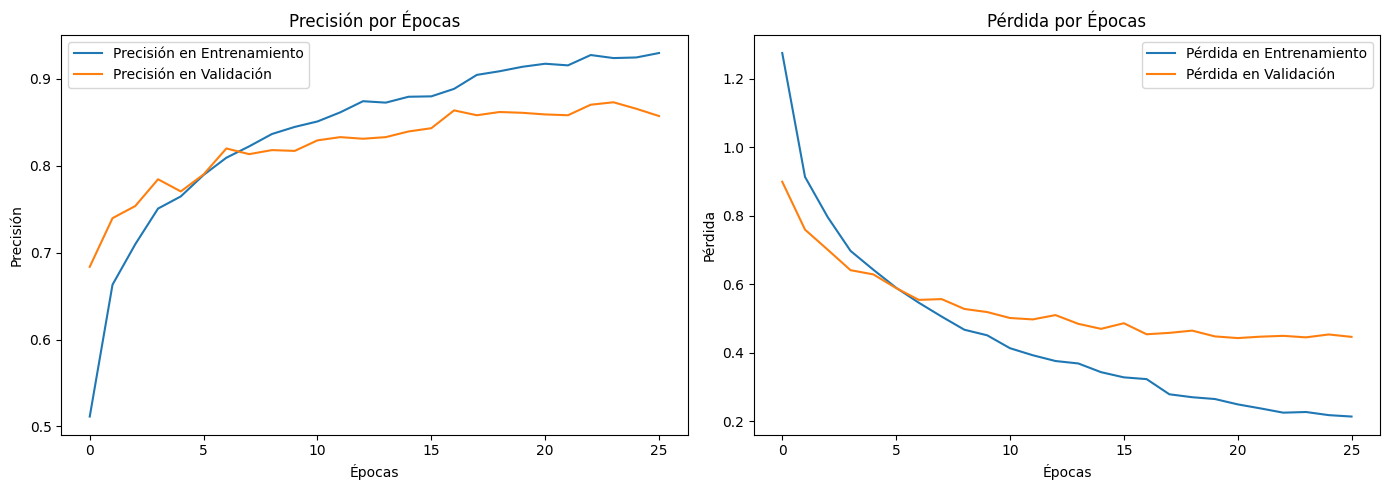

In [17]:
# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 fila, 2 columnas

# Gráfico de precisión
axes[0].plot(history.history['accuracy'], label='Precisión en Entrenamiento')
axes[0].plot(history.history['val_accuracy'], label='Precisión en Validación')
axes[0].set_xlabel('Épocas')
axes[0].set_ylabel('Precisión')
axes[0].set_title('Precisión por Épocas')
axes[0].legend()

# Gráfico de pérdida
axes[1].plot(history.history['loss'], label='Pérdida en Entrenamiento')
axes[1].plot(history.history['val_loss'], label='Pérdida en Validación')
axes[1].set_xlabel('Épocas')
axes[1].set_ylabel('Pérdida')
axes[1].set_title('Pérdida por Épocas')
axes[1].legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


### Generación de Predicciones y Reporte de Clasificación

#### **1. Generar Predicciones**
- **Propósito**:
  - Comparar las etiquetas reales (`y_true`) con las predicciones del modelo (`y_pred`).
- **Pasos**:
  - Itera a través del conjunto de validación (`val_ds`).
  - `model.predict(images)`: Genera las probabilidades predichas para cada clase.
  - `np.argmax(preds, axis=1)`: Obtiene la clase con la mayor probabilidad como predicción.
  - Extiende las listas `y_true` y `y_pred` con las etiquetas reales y las predicciones respectivamente.

---

#### **2. Reporte de Clasificación**
- **Propósito**:
  - Evaluar el desempeño del modelo por clase utilizando métricas como:
    - **Precisión (Precision)**: Proporción de predicciones correctas para una clase específica.
    - **Sensibilidad (Recall)**: Proporción de ejemplos correctamente identificados de una clase.
    - **F1-score**: Media armónica de precisión y recall, útil en datasets desbalanceados.
- **`classification_report`**:
  - Genera un desglose detallado de estas métricas para cada clase.
  - Parámetros clave:
    - `y_true`: Etiquetas reales.
    - `y_pred`: Predicciones del modelo.
    - `target_names=class_names`: Nombres de las clases para interpretar fácilmente el reporte.


In [18]:
# Obtener predicciones en el conjunto de validación
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())  # Convertir a lista
    y_pred.extend(np.argmax(preds, axis=1))  # Índice de la clase predicha

2/2 [==============================] - 0s 121ms/step


In [19]:
# Calcular el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_true, y_pred, target_names=class_names))

Reporte de Clasificación:
                  precision    recall  f1-score   support

 air_conditioner       0.84      0.90      0.87       143
children_playing       0.74      0.85      0.79       133
        drilling       0.85      0.90      0.88       168
  engine_idiling       0.91      0.86      0.89       149
      jackhammer       0.92      0.94      0.93       157
           siren       0.89      0.86      0.88       161
    street_music       0.85      0.70      0.77       161

        accuracy                           0.86      1072
       macro avg       0.86      0.86      0.86      1072
    weighted avg       0.86      0.86      0.86      1072



### Visualización de la Matriz de Confusión

#### **1. Propósito**
La matriz de confusión muestra:
- **Aciertos**: Elementos en la diagonal principal, donde las etiquetas reales coinciden con las predicciones.
- **Errores**: Elementos fuera de la diagonal principal, donde las etiquetas reales no coinciden con las predicciones.

#### **2. Herramientas Utilizadas**
- **`sns.heatmap`**:
  - Utiliza la librería Seaborn para graficar la matriz de confusión en un formato visual claro.
  - Parámetros clave:
    - `annot=True`: Muestra los valores numéricos en cada celda.
    - `fmt='d'`: Formato de los valores como enteros.
    - `xticklabels` y `yticklabels`: Etiquetas para las predicciones y las clases reales.
    - `cmap="Blues"`: Paleta de colores para el gráfico.

In [20]:
conf_matrix = confusion_matrix(y_true, y_pred)

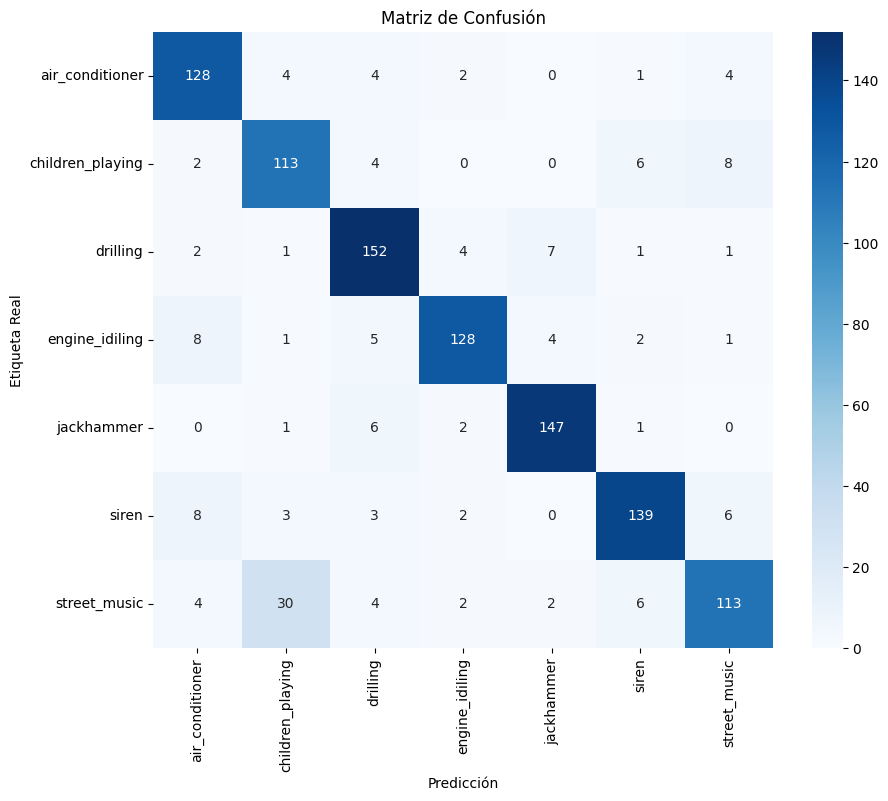

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

## **Testeo del modelo**

### Predicción en una Imagen Individual

En este bloque se realiza una predicción para una imagen específica utilizando el modelo entrenado.

#### **1. Propósito**
- Probar el modelo con una imagen individual para verificar cómo clasifica el modelo.
- Obtener la clase predicha y el nivel de confianza en la predicción.

---

#### **2. Proceso**
1. **Cargar y preprocesar la imagen**:
   - Se utiliza la función `load_img` para cargar la imagen desde la ruta especificada.
   - La imagen se redimensiona a **224x224 píxeles** para que sea compatible con el modelo.
   - Se convierte la imagen a un array y se normaliza dividiendo los valores de píxeles por `255.0`.
   - Se añade una dimensión adicional para que el modelo procese la imagen como un lote de tamaño 1.

2. **Generar predicción**:
   - `model.predict(img_array)`: Genera las probabilidades de pertenecer a cada clase.
   - `np.argmax(predictions)`: Devuelve el índice de la clase con la probabilidad más alta.
   - `class_names[np.argmax(predictions)]`: Convierte el índice en el nombre de la clase.

3. **Resultado**:
   - Se muestra la clase predicha y el nivel de confianza de la predicción (probabilidad más alta).


In [31]:
# Ruta a la imagen que deseas predecir  # Cambia a la ruta de tu imagen
img_path = "D:\\Folder_Jupiter\\Analisis_Espectros\\DataSetImages_FULL\\DataSetImages\\Scalograms\\Bump\\children_playing\\170564-2-0-0.png"

# Cargar y preprocesar la imagen
img = load_img(img_path, target_size=(224, 224))  # Asegúrate de que coincida con el tamaño del modelo
img_array = img_to_array(img) / 255.0  # Normaliza los píxeles a [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Añade la dimensión del lote

# Generar predicción
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
confidence = np.max(predictions)

print(f"La imagen pertenece a la clase: {predicted_class} con una confianza del {confidence:.2f}")


1/1 [==============================] - 0s 23ms/step
La imagen pertenece a la clase: children_playing con una confianza del 0.99


## **Guardar el modelo**

In [23]:
model.save("model_Bump_tl_v1.keras")